In [1]:
import tensorflow as tf
from matplotlib import pyplot
from keras.datasets import fashion_mnist
from tensorflow.keras import *
from tensorflow.keras.layers import *
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import sys
import os
from keras.utils.vis_utils import plot_model

sys.path.insert(1, os.path.join(sys.path[0], '../../..'))

from utils import *

%matplotlib inline
%config Completer.use_jedi = False

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

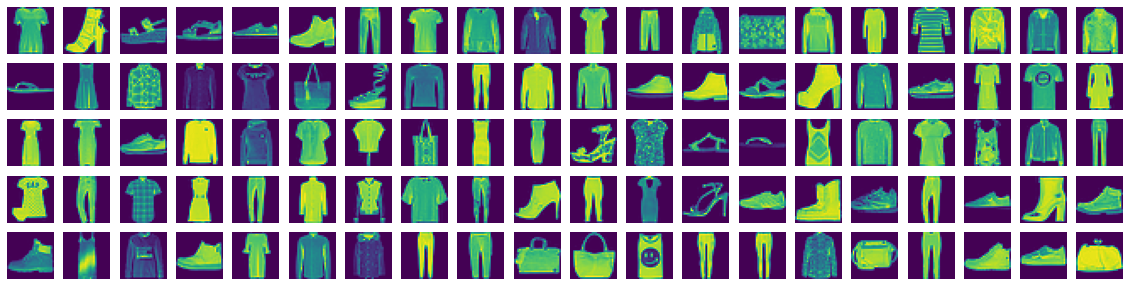

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
show_dataset(x_train)

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
num_classes = 10 

mean = np.mean(x_train,axis=(0, 1, 2))
std = np.std(x_train, axis=(0, 1, 2))

x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

y_train = utils.to_categorical(y_train, num_classes) 
y_test = utils.to_categorical(y_test, num_classes) 

In [5]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [6]:
x_train.shape

(60000, 28, 28, 1)

In [7]:
def build_model(weight_decay= 0.00005, x_shape=[28,28,1], num_classes=10):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), padding='same',
                         input_shape=x_shape,kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    
    model.add(Conv2D(32, (3, 3), padding='same',
                         input_shape=x_shape,kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))
    
    
    model.add(Conv2D(64, (3, 3), padding='same',
                         input_shape=x_shape,kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    
    model.add(Conv2D(64, (3, 3), padding='same',
                         input_shape=x_shape,kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))
    
    
    model.add(Conv2D(128, (3, 3), padding='same',
                         input_shape=x_shape,kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    
    model.add(Conv2D(128, (3, 3), padding='same',
                         input_shape=x_shape,kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

   

    model.add(Flatten())
    model.add(Dense(128,kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())

    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    return model

In [8]:
model = build_model()

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
history = model.fit(x_train, y_train, batch_size=256, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
235/235 [==============================] - 9s 24ms/step - loss: 0.7510 - accuracy: 0.7495 - val_loss: 0.5100 - val_accuracy: 0.8191
Epoch 2/100
235/235 [==============================] - 5s 21ms/step - loss: 0.4506 - accuracy: 0.8480 - val_loss: 0.4198 - val_accuracy: 0.8602
Epoch 3/100
235/235 [==============================] - 5s 21ms/step - loss: 0.3852 - accuracy: 0.8733 - val_loss: 0.3331 - val_accuracy: 0.8918
Epoch 4/100
235/235 [==============================] - 5s 20ms/step - loss: 0.3496 - accuracy: 0.8871 - val_loss: 0.3292 - val_accuracy: 0.8923
Epoch 5/100
235/235 [==============================] - 5s 21ms/step - loss: 0.3235 - accuracy: 0.8946 - val_loss: 0.2923 - val_accuracy: 0.9035
Epoch 6/100
235/235 [==============================] - 5s 21ms/step - loss: 0.3097 - accuracy: 0.9008 - val_loss: 0.3081 - val_accuracy: 0.8972
Epoch 7/100
235/235 [==============================] - 5s 21ms/step - loss: 0.2971 - accuracy: 0.9064 - val_loss: 0.2755 - val_accuracy:

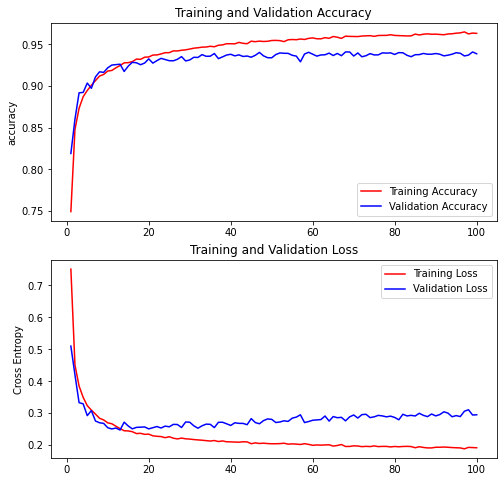

In [12]:
print_history_chart(history)

In [13]:
pprint(full_evaluate(model, x_test, y_test))

{'accuracy_score': 0.9386,
 'f1_score_macro': 0.9380939423015722,
 'f1_score_weighted': 0.939106057698428}


In [18]:
model.save('vanilla_fashion_mnist.h5')

In [19]:
model = tf.keras.models.load_model("vanilla_fashion_mnist.h5")

In [20]:
pprint(full_evaluate(model, x_test, y_test))

{'accuracy_score': 0.9386,
 'f1_score_macro': 0.9380939423015722,
 'f1_score_weighted': 0.939106057698428}


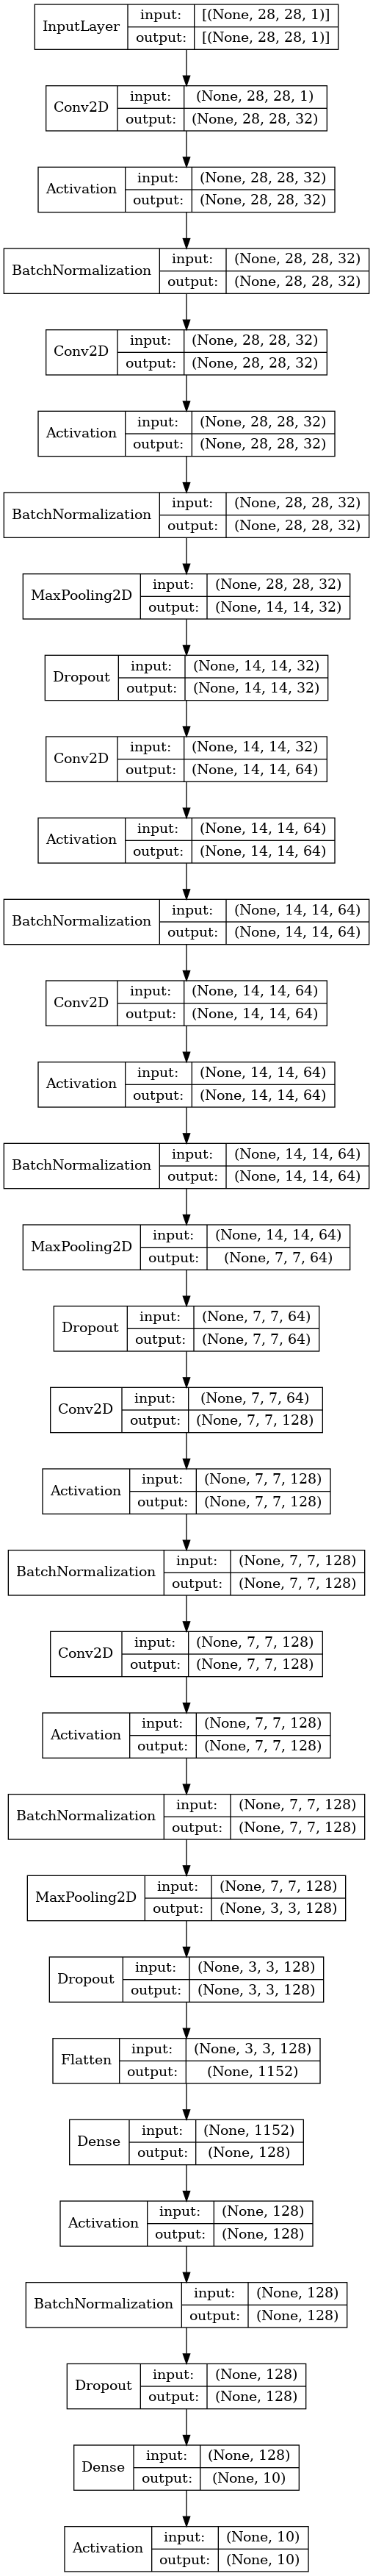

In [21]:
plot_model(model, show_shapes=True, show_layer_names=False)